In [22]:
import pandas as pd
from sklearn import tree
from sklearn import metrics
from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.cross_validation import KFold, StratifiedKFold, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_predict
from sklearn import linear_model
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt
import numpy as np
from __future__ import print_function

In [23]:
df_match = pd.read_csv('dataset.csv')
all_match_attributes=df_match.columns.values.tolist()
after_match_attributes =['home_team_goal', 'away_team_goal', 'possession_home', 'shoton_home', 'shoton_away', 
                      'shotoff_home', 'shotoff_away', 'corner_home', 'corner_away', 'cross_home', 'cross_away', 
                      'foulcommit_home', 'foulcommit_away', 'rcard_home', 'rcard_away', 'ycard_home', 'ycard_away', 
                      'throwin_home', 'throwin_away']
before_match_attributes = list(set(all_match_attributes) - set(after_match_attributes))
before_match_all=before_match_attributes+['possession_home']
df_before_match = df_match[before_match_all]

In [24]:
holdout_per=0.2
df_before_match_out_sample = df_before_match.sample(frac=holdout_per)
df_before_match_out_testtarget = df_before_match_out_sample['possession_home']
df_before_match_out_test =df_before_match_out_sample[before_match_attributes]

df_before_match_out_left = df_before_match.iloc[list(set(df_before_match.index.values.tolist())-set(df_before_match_out_sample.index.values.tolist()))]
df_before_match_out_training = df_before_match_out_left[before_match_attributes]
df_before_match_out_trainingtarget = df_before_match_out_left['possession_home']

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  41 out of  41 | elapsed:    0.4s finished

[2017-11-13 00:47:36] Features: 1/41 -- score: -58.7289698381[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.4s finished

[2017-11-13 00:47:36] Features: 2/41 -- score: -53.3892854073[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  39 out of  39 | elapsed:    0.6s finished

[2017-11-13 00:47:37] Features: 3/41 -- score: -52.5486830747[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  38 out of  38 | elapsed:    0.6s finished

[2017-11-13 00:47:37] Features: 4/41 -- score: -51.6461824979[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  37 out of  37 | elapsed:    0.5s finished

[

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s finished

[2017-11-13 00:47:58] Features: 40/41 -- score: -52.1689079911[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished

[2017-11-13 00:47:58] Features: 41/41 -- score: -52.3437553235

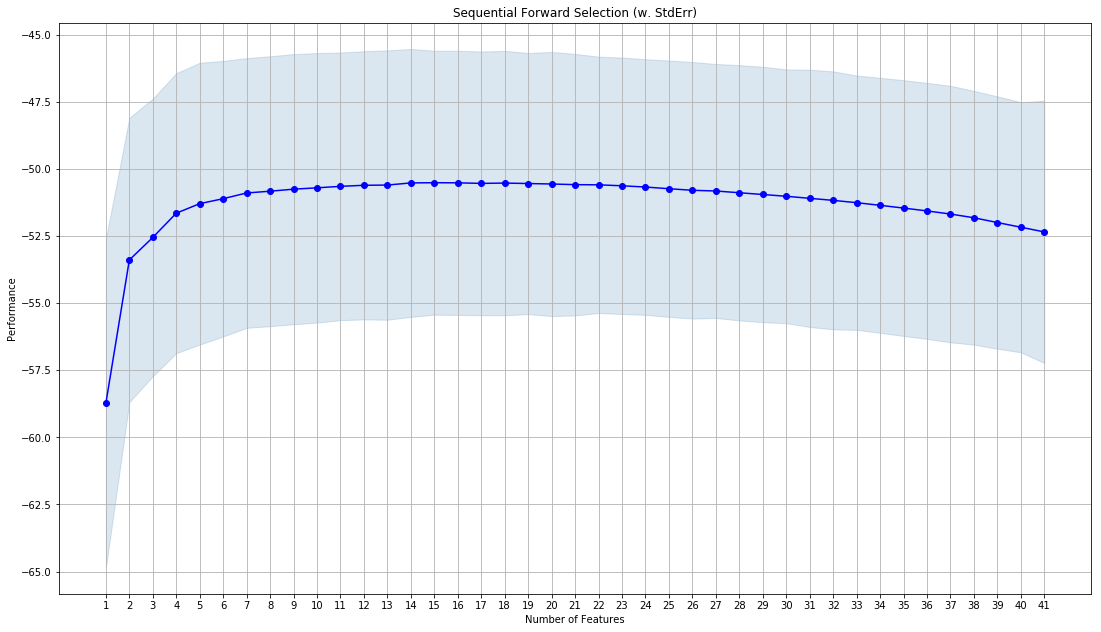

In [25]:
lr = linear_model.LinearRegression()
sfs_greedy = SFS(lr, 
           k_features=df_before_match_out_training.shape[1], 
           forward=True, 
           floating=False, 
           verbose=2,
           scoring='neg_mean_squared_error',
           cv=10)
sfs_greedy = sfs_greedy.fit(df_before_match_out_training.as_matrix(), df_before_match_out_trainingtarget.as_matrix())
fig = plot_sfs(sfs_greedy.get_metric_dict(), kind='std_err')
fig.set_size_inches(18.5, 10.5, forward=True)
plt.title('Sequential Forward Selection (w. StdErr)')
plt.grid()
plt.show()

In [26]:
df_features_forward_greedy = pd.DataFrame.from_dict(sfs_greedy.get_metric_dict()).T
df_features_forward_greedy

,avg_score,ci_bound,cv_scores,feature_idx,std_dev,std_err
1,-58.729,13.6689,"[-37.4677973768, -33.6521225601, -42.446939286...","(8,)",18.404,6.13466
2,-53.3893,11.8031,"[-37.4085971788, -33.3538213249, -38.17086898,...","(8, 14)",15.8919,5.29729
3,-52.5487,11.5306,"[-40.5448889297, -33.7908060261, -36.130671567...","(8, 4, 14)",15.525,5.17499
4,-51.6462,11.6248,"[-40.9979286367, -34.3073129744, -33.714687223...","(8, 18, 4, 14)",15.6518,5.21727
5,-51.2903,11.7016,"[-39.0898452124, -33.8116966977, -34.431368342...","(4, 8, 14, 18, 19)",15.7553,5.25175
6,-51.1052,11.4419,"[-38.0110040218, -33.7795004351, -34.87955241,...","(4, 8, 14, 18, 19, 29)",15.4055,5.13516
7,-50.8921,11.1997,"[-38.5144679544, -34.5026858283, -35.596701856...","(4, 8, 14, 16, 18, 19, 29)",15.0794,5.02647
8,-50.8261,11.2098,"[-38.3765655068, -34.3163244505, -35.584880161...","(4, 37, 8, 14, 16, 18, 19, 29)",15.093,5.031
9,-50.7506,11.2172,"[-38.3022111224, -34.6306287177, -35.889225353...","(4, 8, 14, 16, 18, 19, 21, 29, 37)",15.103,5.03434
10,-50.7005,11.1924,"[-38.2032136545, -34.3155400654, -36.337505741...","(4, 8, 14, 16, 18, 19, 21, 29, 31, 37)",15.0696,5.0232


#### simple greedy solution: 


In [27]:
greedy_selected_columns_index=list()

selected_column_indice=df_features_forward_greedy[df_features_forward_greedy['avg_score'] == df_features_forward_greedy['avg_score'].max()]['feature_idx']
greedy_selected_columns_index=selected_column_indice.tolist()
greedy_selected_colname_list = df_before_match_out_training.columns[greedy_selected_columns_index].tolist()
print("Selected columns by simple greedy sequential forward selection are: \n",greedy_selected_colname_list)

Selected columns by simple greedy sequential forward selection are: 
 ['buildUpPlayPassing_away', 'IWH', 'chanceCreationCrossing_home', 'B365D', 'WHA', 'buildUpPlayPassing_home', 'defencePressure_home', 'B365H', 'buildUpPlayDribbling_home', 'defenceAggression_away', 'WHH', 'defenceTeamWidth_away', 'buildUpPlaySpeed_home', 'buildUpPlaySpeed_away', 'chanceCreationCrossing_away']


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  41 out of  41 | elapsed:    0.4s finished

[2017-11-13 00:47:59] Features: 1/41 -- score: -58.7289698381[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished

[2017-11-13 00:47:59] Features: 2/41 -- score: -53.3892854073[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  39 out of  39 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished

[2017-11-13 00:47:59] Features: 3/41 -- score: -52.5486830747[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s rem

[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:    0.5s finished

[2017-11-13 00:48:16] Features: 19/41 -- score: -50.3786141296[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  22 out of  22 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:    0.5s finished

[2017-11-13 00:48:17] Features: 20/41 -- score: -50.3939524977[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  21 out of  21 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.6s finished

[2017-11-13 00:48:18] Features: 21/41 -- score: -50.4

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  36 out of  36 | elapsed:    2.0s finished

[2017-11-13 00:48:54] Features: 37/41 -- score: -51.6776422551[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  37 out of  37 | elapsed:    2.6s finished

[2017-11-13 00:48:56] Features: 38/41 -- score: -51.8162235084[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  38 out of  38 | elapsed:    2.4s finished

[2017-11-13 00:48:59] Features: 39/41 -- score: -51.9

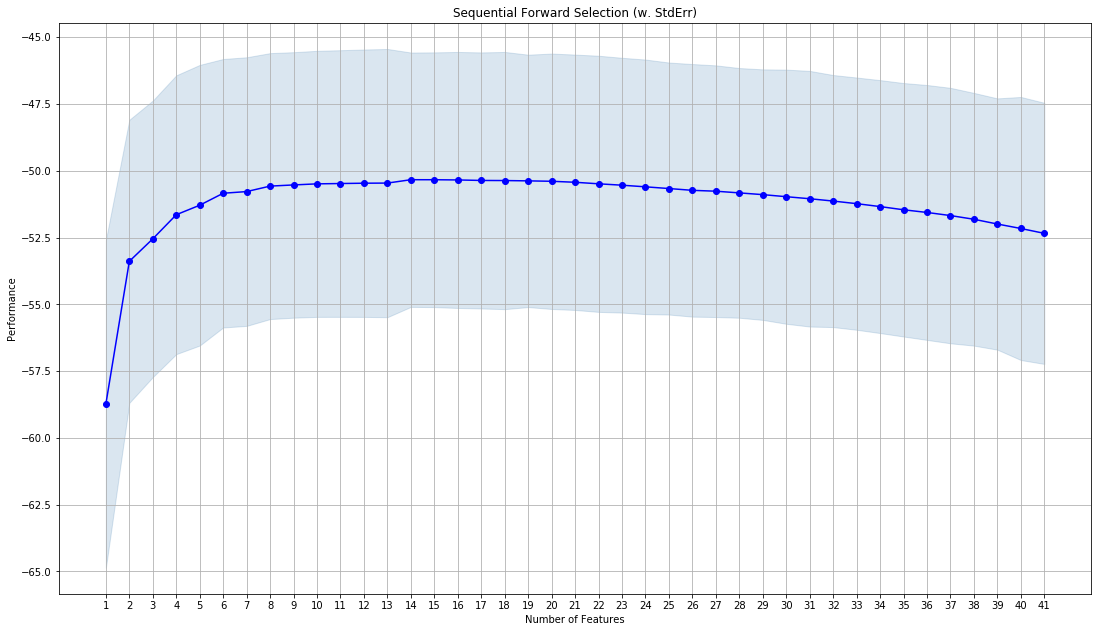

In [28]:
lr = linear_model.LinearRegression()
sfs_float = SFS(lr, 
           k_features=df_before_match_out_training.shape[1], 
           forward=True, 
           floating=True, 
           verbose=2,
           scoring='neg_mean_squared_error',
           cv=10)
sfs_float = sfs_float.fit(df_before_match_out_training.as_matrix(), df_before_match_out_trainingtarget.as_matrix())
fig = plot_sfs(sfs_float.get_metric_dict(), kind='std_err')
fig.set_size_inches(18.5, 10.5, forward=True)
plt.title('Sequential Forward Selection (w. StdErr)')
plt.grid()
plt.show()

In [29]:
df_features_forward_float = pd.DataFrame.from_dict(sfs_float.get_metric_dict()).T
df_features_forward_float

,avg_score,ci_bound,cv_scores,feature_idx,std_dev,std_err
1,-58.729,13.6689,"[-37.4677973768, -33.6521225601, -42.446939286...","(8,)",18.404,6.13466
2,-53.3893,11.8031,"[-37.4085971788, -33.3538213249, -38.17086898,...","(8, 14)",15.8919,5.29729
3,-52.5487,11.5306,"[-40.5448889297, -33.7908060261, -36.130671567...","(8, 4, 14)",15.525,5.17499
4,-51.6462,11.6248,"[-40.9979286367, -34.3073129744, -33.714687223...","(8, 18, 4, 14)",15.6518,5.21727
5,-51.2903,11.7016,"[-39.0898452124, -33.8116966977, -34.431368342...","(4, 8, 14, 18, 19)",15.7553,5.25175
6,-50.8421,11.1963,"[-38.5097691075, -34.4637828447, -35.565556063...","(4, 8, 16, 18, 19, 29)",15.0748,5.02494
7,-50.7796,11.2007,"[-38.3837111765, -34.2938601097, -35.571738831...","(4, 37, 8, 16, 18, 19, 29)",15.0808,5.02693
8,-50.5746,11.0895,"[-38.5931147694, -34.6772062187, -35.846991528...","(4, 9, 16, 18, 19, 21, 29, 37)",14.931,4.97701
9,-50.5312,11.0712,"[-38.486072539, -34.4796060666, -36.3341969211...","(4, 9, 16, 18, 19, 21, 29, 31, 37)",14.9064,4.96881
10,-50.4904,11.0942,"[-37.9098446834, -34.0598054135, -36.211676097...","(4, 9, 16, 18, 19, 21, 29, 31, 32, 37)",14.9374,4.97914


#### float solution: 

In [30]:
float_selected_columns_index=list()

selected_column_indice=df_features_forward_float[df_features_forward_float['avg_score'] == df_features_forward_float['avg_score'].max()]['feature_idx']
float_selected_columns_index=selected_column_indice.tolist()
float_selected_colname_list = df_before_match_out_training.columns[float_selected_columns_index].tolist()
print("Selected columns by float greedy sequential forward selection are: \n",float_selected_colname_list)

Selected columns by float greedy sequential forward selection are: 
 ['buildUpPlayPassing_away', 'chanceCreationCrossing_home', 'WHA', 'defencePressure_home', 'B365H', 'VCA', 'buildUpPlayDribbling_home', 'LBA', 'defenceAggression_away', 'WHH', 'defenceTeamWidth_away', 'VCD', 'buildUpPlaySpeed_home', 'chanceCreationCrossing_away']


## Use the selected columns from both simple greedy and float greedy to use on the outter layer holdout validation

#### 1. Simple Greedy

In [31]:
df_before_match_greedy_training=df_before_match_out_training[greedy_selected_colname_list]
df_before_match_greedy_test=df_before_match_out_test[greedy_selected_colname_list]

lr_greedy = linear_model.LinearRegression()
lr_greedy.fit(df_before_match_greedy_training.as_matrix(), df_before_match_out_trainingtarget.as_matrix())
before_match_greedy_pred = lr_greedy.predict(df_before_match_greedy_test.as_matrix())


print(r2_score(df_before_match_out_testtarget.tolist(), before_match_greedy_pred.tolist()))


0.419410932893


In [32]:
df_before_match_float_training=df_before_match_out_training[float_selected_colname_list]
df_before_match_float_test=df_before_match_out_test[float_selected_colname_list]

lr_greedy = linear_model.LinearRegression()
lr_greedy.fit(df_before_match_float_training.as_matrix(), df_before_match_out_trainingtarget.as_matrix())
before_match_float_pred = lr_greedy.predict(df_before_match_float_test.as_matrix())


print(r2_score(df_before_match_out_testtarget.tolist(), before_match_float_pred.tolist()))

0.411118387205


## ANN

In [33]:
df_before_match.head()

,B365A,BWH,IWD,defenceTeamWidth_home,buildUpPlayPassing_away,IWA,LBH,LBD,IWH,chanceCreationCrossing_home,...,defenceTeamWidth_away,VCD,buildUpPlaySpeed_home,defenceAggression_home,defencePressure_away,buildUpPlaySpeed_away,BWA,chanceCreationCrossing_away,chanceCreationShooting_home,possession_home
0,4.33,1.80,3.40,45,65,4.30,1.80,3.30,1.80,70,...,40,3.40,70,55,40,60,4.00,70,70,57
1,2.10,3.45,3.20,35,59,2.20,3.30,3.25,3.20,70,...,30,3.25,70,70,30,70,2.05,70,50,57
2,4.50,1.72,3.50,30,70,4.60,1.80,3.30,1.75,70,...,70,3.50,58,70,70,70,4.50,70,50,60
3,2.88,2.45,3.20,70,70,2.85,2.38,3.20,2.40,70,...,35,3.25,70,70,35,65,2.75,70,70,51
4,3.75,2.00,3.25,35,70,3.40,2.10,3.20,2.10,70,...,35,3.25,60,70,35,55,3.65,70,55,53


In [34]:
print(before_match_attributes)

['B365A', 'BWH', 'IWD', 'defenceTeamWidth_home', 'buildUpPlayPassing_away', 'IWA', 'LBH', 'LBD', 'IWH', 'chanceCreationCrossing_home', 'WHD', 'buildUpPlayPositioningClass_home_isOrganised', 'BWD', 'buildUpPlayDribbling_away', 'B365D', 'stage', 'WHA', 'chanceCreationPositioningClass_home_isOrganised', 'buildUpPlayPassing_home', 'defencePressure_home', 'buildUpPlayPositioningClass_away_isOrganised', 'B365H', 'chanceCreationPositioningClass_away_isOrganised', 'chanceCreationPassing_home', 'chanceCreationShooting_away', 'VCA', 'buildUpPlayDribbling_home', 'LBA', 'chanceCreationPassing_away', 'defenceAggression_away', 'VCH', 'WHH', 'defenceTeamWidth_away', 'VCD', 'buildUpPlaySpeed_home', 'defenceAggression_home', 'defencePressure_away', 'buildUpPlaySpeed_away', 'BWA', 'chanceCreationCrossing_away', 'chanceCreationShooting_home']


In [35]:
#before_match_attributes = ['LBH']

In [36]:
# ANN
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split

df = df_before_match

train_df, test_df = train_test_split(df, test_size=0.2)

trainX = train_df[before_match_attributes]
trainY = train_df['possession_home']

testX = test_df[before_match_attributes]
testY = test_df['possession_home']

fnn = MLPRegressor(solver='adam', alpha=1e-2,
                    hidden_layer_sizes=(64, 32, ),
                    random_state=1,
                    nesterovs_momentum=False,
                    momentum=0.99,
                    early_stopping=False,
                    activation='logistic',
                    batch_size=16,
                    warm_start=False,
                    max_iter=3000)

#fnn = MLPRegressor(solver='adam', alpha=1e-3,
#                    hidden_layer_sizes=(256,128,64,32,),
#                    random_state=1,
#                    nesterovs_momentum=False,
#                    momentum=0.99,
#                    early_stopping=False,
#                    activation='logistic',
#                    batch_size=32,
#                    warm_start=False,
#                  max_iter=3000)

model = fnn.fit(trainX, trainY)                         


In [37]:
print(model)
print(model.loss_curve_)
print(model.n_layers_)

MLPRegressor(activation='logistic', alpha=0.01, batch_size=16, beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(64, 32), learning_rate='constant',
       learning_rate_init=0.001, max_iter=3000, momentum=0.99,
       nesterovs_momentum=False, power_t=0.5, random_state=1, shuffle=True,
       solver='adam', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)
[1200.1425832479626, 1030.8465655639943, 901.73341935577207, 790.65377009995586, 692.09592681624565, 604.15318972276862, 525.70986952476676, 454.08097856591775, 382.89424855528421, 324.24603921633218, 274.68048144383471, 228.56603446217903, 187.91930165888178, 156.02846421500601, 130.29681098832424, 109.59223502768197, 93.0250131856953, 79.867372008856222, 69.569877191645929, 61.631809712298313, 55.61156768653553, 51.134339526499694, 47.881628534513965, 45.550181772278329, 43.929284102276391, 42.822140436939144, 42.101093626371437, 41.641600736998875, 41.351193

In [38]:
#model.predict(testX) - testY
y_pred = model.predict(testX)
y_true = testY
mean_squared_error(y_true, y_pred)

49.099689995701375

In [39]:
print("Predicted: " + str(model.predict(testX.iloc[470].values.reshape(1, -1))) + ", actual: " + str(testY.iloc[470]))

print("Predicted: " + str(model.predict(testX.iloc[123].values.reshape(1, -1))) + ", actual: " + str(testY.iloc[123]))

print("Predicted: " + str(model.predict(testX.iloc[321].values.reshape(1, -1))) + ", actual: " + str(testY.iloc[321]))

print("Predicted: " + str(model.predict(testX.iloc[420].values.reshape(1, -1))) + ", actual: " + str(testY.iloc[420]))


Predicted: [ 46.6441023], actual: 41
Predicted: [ 52.60814435], actual: 36
Predicted: [ 57.0227647], actual: 55
Predicted: [ 43.43182945], actual: 41


In [56]:


from sklearn.model_selection import KFold

linear_features = ['buildUpPlayPassing_home', 'defenceTeamWidth_away', 'B365H',
                   'buildUpPlayDribbling_home', 'buildUpPlaySpeed_home', 'chanceCreationShooting_away',
                   'IWA', 'chanceCreationCrossing_home', 'buildUpPlaySpeed_away',
                   'buildUpPlayPassing_away', 'defenceAggression_away', 'defencePressure_home']


X_fnn = df[before_match_attributes]
X_lin = df[linear_features]
y = df['possession_home']

K = 10
v = K - 1


kf = KFold(n_splits=K, shuffle=True)

fnn_tests = []
lin_tests = []
avg_tests = []

for train_index, test_index in kf.split(X_fnn):
   
    X_train_fnn, X_test_fnn = X_fnn.iloc[train_index], X_fnn.iloc[test_index]
    X_train_lin, X_test_lin = X_lin.iloc[train_index], X_lin.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    fnn_fit = fnn.fit(X_train_fnn, y_train)
    y_pred_fnn = fnn_fit.predict(X_test_fnn)
    mse_fnn = mean_squared_error(y_test, y_pred_fnn)
    print("FNN: " + str(mse_fnn))
    fnn_tests.append(mse_fnn)
    
    lin_model = linear_model.LinearRegression()
    lin_fit = lin_model.fit(X_train_lin, y_train)
    y_pred_lin = lin_fit.predict(X_test_lin)
    mse_lin = mean_squared_error(y_test, y_pred_lin)
    print("LIN: " + str(mse_lin))
    lin_tests.append(mse_lin)
    
    y_train_avg = sum(y_train) / len(y_train)
    y_pred_const = np.array([y_train_avg] * len(y_test))
    mse_const = mean_squared_error(y_test, y_pred_const)
    print("AVG: " + str(mse_const))
    avg_tests.append(mse_const)
    print("AVG prediction: " + str(y_train_avg))

print("FNN CV MSE: " + str(np.mean(fnn_tests)))
print("Linear model CV MSE: " + str(np.mean(lin_tests)))
print("Const AVG CV MSE: " + str(np.mean(avg_tests)))

    

FNN: 53.7428261879
LIN: 51.602221394
AVG: 83.3800597243
AVG prediction: 51.6256386438
FNN: 58.1194347358
LIN: 58.7772897795
AVG: 89.1005939237
AVG prediction: 51.709707385
FNN: 47.9960029345
LIN: 47.1463835481
AVG: 78.1850063797
AVG prediction: 51.5777984208
FNN: 46.0596158855
LIN: 39.2022045417
AVG: 76.8370232991
AVG prediction: 51.6750232126
FNN: 49.4881387847
LIN: 49.4301577786
AVG: 85.0996755172
AVG prediction: 51.6490250696
FNN: 56.1728310064
LIN: 56.9155555269
AVG: 85.1482352669
AVG prediction: 51.6592386258
FNN: 49.0539094851
LIN: 51.8051889093
AVG: 94.7636585288
AVG prediction: 51.6360259981
FNN: 46.8305870129
LIN: 45.4211481654
AVG: 80.5145389057
AVG prediction: 51.6573816156
FNN: 42.6963958484
LIN: 43.4951065703
AVG: 71.9669609269
AVG prediction: 51.5766016713
FNN: 55.1506126796
LIN: 49.9174763131
AVG: 72.2146229113
AVG prediction: 51.6063138347
FNN CV MSE: 50.5310354561
Linear model CV MSE: 49.3712732527
Const AVG CV MSE: 81.7210375384


In [58]:
# Performance comparison
# K=10, v=9
alpha = 0.05
zs = np.array(fnn_tests) - np.array(lin_tests)
z_bar = np.mean(zs)
std_z_bar = np.std(zs)

from scipy.stats import t

theta_l = z_bar + std_z_bar * t.ppf(alpha/2, v)
theta_u = z_bar + std_z_bar * t.ppf(1 - alpha/2, v)
print("z: " + str(z_bar))
print("theta_l: " + str(theta_l))
print("theta_u: " + str(theta_u))

z: 1.15976220341
theta_l: -5.13558727048
theta_u: 7.45511167731
